In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.io import fits

In [2]:
#open fits file assuming file is in this directory
hdul = fits.open('Multifreq_Images_From_Instrument.fits')

In [3]:
# use .info command to get basic data for the file
hdul.info()

Filename: Multifreq_Images_From_Instrument.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (3, 3145728, 3)   float64   
  1                1 ImageHDU         8   (3, 3145728, 3)   float64   
  2                1 ImageHDU         8   (3, 3145728, 3)   float64   


In [4]:
freq1=hdul[0].data
freq2=hdul[1].data
freq3=hdul[2].data

In [5]:
#open fits file assuming file is in this directory
hdu2 = fits.open('Multifreq_Images_From_Fits.fits')

In [6]:
# use .info command to get basic data for the file
hdu2.info()

Filename: Multifreq_Images_From_Fits.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (3, 3145728, 3)   float64   
  1                1 ImageHDU         8   (3, 3145728, 3)   float64   
  2                1 ImageHDU         8   (3, 3145728, 3)   float64   


In [7]:
Ffreq1=hdul[0].data
Ffreq2=hdul[1].data
Ffreq3=hdul[2].data

In [8]:
# Repository for dictionary and input maps
import qubic
from qubicpack.utilities import Qubic_DataDir
global_dir = Qubic_DataDir(datafile='instrument.py', datadir='../')
dictfilename = global_dir + 'dicts/pipeline_demo.dict'
dictmaps = global_dir + 'doc/'

# Read dictionary chosen
d = qubic.qubicdict.qubicDict()
d.read_from_file(dictfilename)

In [9]:
# Center of the patch observed in galactic coordinates
center = qubic.equ2gal(d['RA_center'], d['DEC_center'])

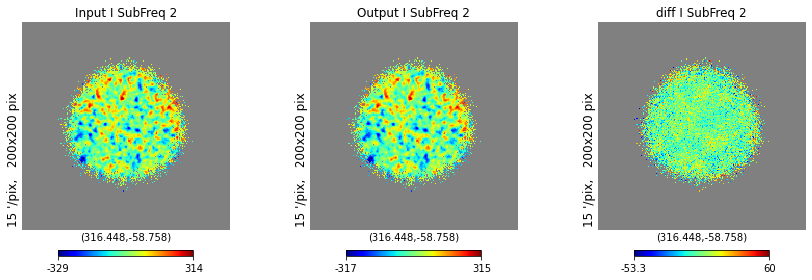

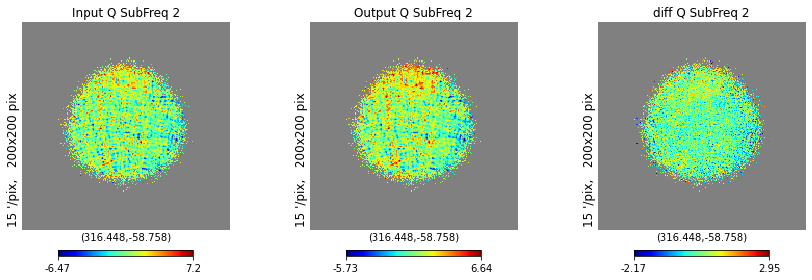

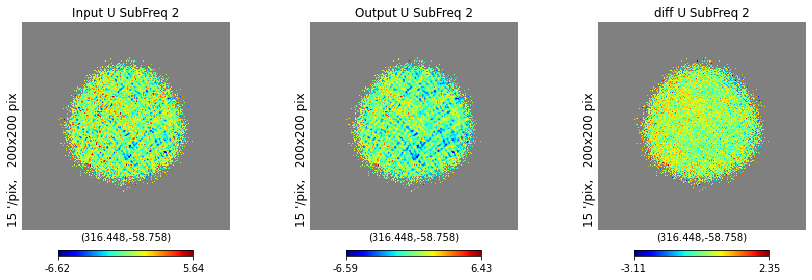

In [10]:
rr=15 # Resolution in arcmin
ifreq=2
for istokes in [0,1,2]:
    plt.figure(istokes,figsize=(12,12)) 
    hp.gnomview(freq1[ifreq, :,istokes], cmap='jet', rot=center, sub=(3,3,3*istokes+1), reso=rr,
                title='Input '+d['kind'][istokes]+' SubFreq {}'.format(ifreq))
    hp.gnomview(freq2[ifreq,:,istokes], cmap='jet',rot=center, sub=(3,3,3*istokes+2), reso=rr,
                title='Output '+d['kind'][istokes]+' SubFreq {}'.format(ifreq))
    hp.gnomview(freq3[ifreq,:,istokes], cmap='jet',rot=center, sub=(3,3,3*istokes+3), reso=rr,
                title='diff '+d['kind'][istokes]+' SubFreq {}'.format(ifreq))
plt.show()

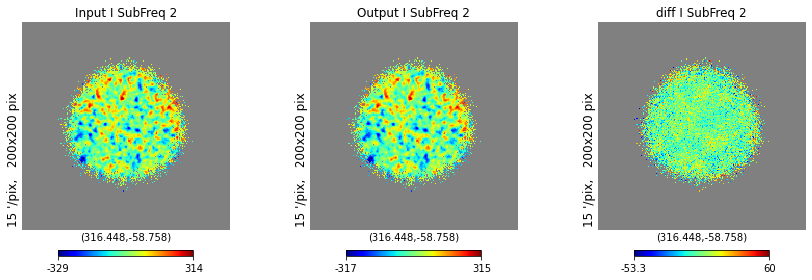

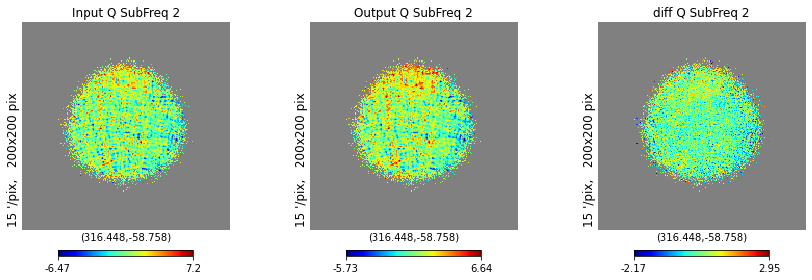

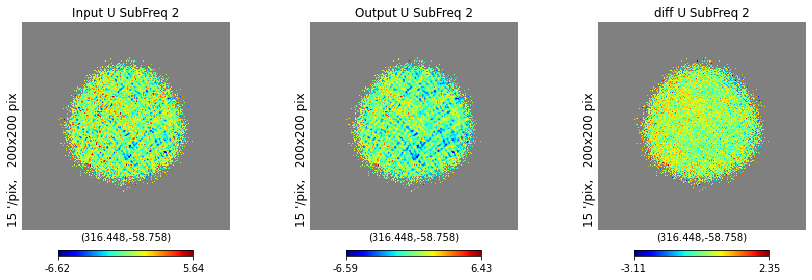

In [11]:
rr=15 # Resolution in arcmin
ifreq=2
for istokes in [0,1,2]:
    plt.figure(istokes,figsize=(12,12)) 
    hp.gnomview(Ffreq1[ifreq, :,istokes], cmap='jet', rot=center, sub=(3,3,3*istokes+1), reso=rr,
                title='Input '+d['kind'][istokes]+' SubFreq {}'.format(ifreq))
    hp.gnomview(Ffreq2[ifreq,:,istokes], cmap='jet',rot=center, sub=(3,3,3*istokes+2), reso=rr,
                title='Output '+d['kind'][istokes]+' SubFreq {}'.format(ifreq))
    hp.gnomview(Ffreq3[ifreq,:,istokes], cmap='jet',rot=center, sub=(3,3,3*istokes+3), reso=rr,
                title='diff '+d['kind'][istokes]+' SubFreq {}'.format(ifreq))
plt.show()

In [12]:
diff1=freq1-Ffreq1
diff2=freq2-Ffreq2
diff3=freq3-Ffreq3




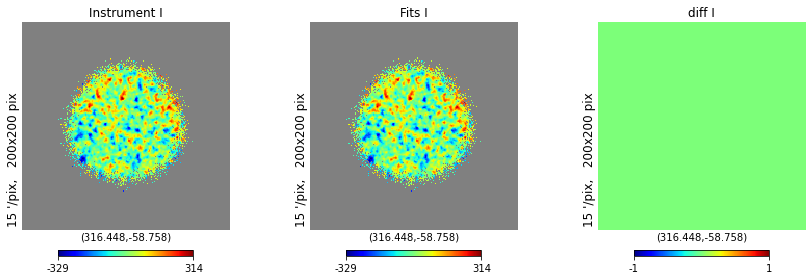

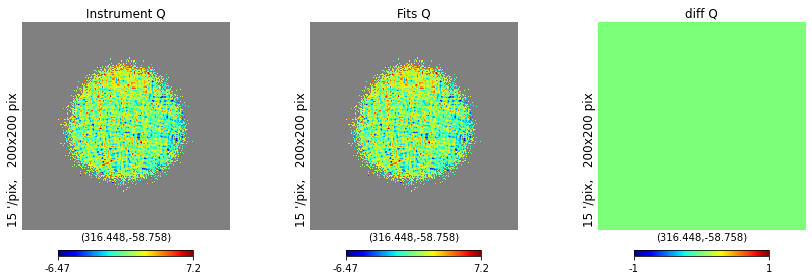

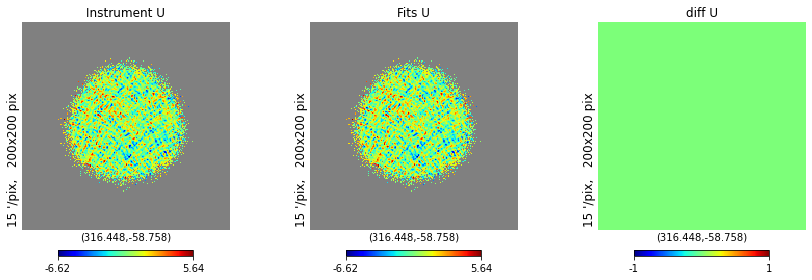

In [40]:
for istokes in [0,1,2]:
    plt.figure(istokes,figsize=(12,12)) 
    hp.gnomview(freq1[ifreq, :,istokes], cmap='jet', rot=center, sub=(3,3,3*istokes+1), reso=rr,
                title='Instrument '+d['kind'][istokes])
    hp.gnomview(Ffreq1[ifreq,:,istokes], cmap='jet',rot=center, sub=(3,3,3*istokes+2), reso=rr,
                title='Fits '+d['kind'][istokes])
    hp.gnomview(diff1[ifreq,:,istokes], cmap='jet',rot=center, sub=(3,3,3*istokes+3), reso=rr,
                title='diff '+d['kind'][istokes])
plt.show()

In [41]:
fitss=fits.open('Multifreq_Images_From_Fits.fits')
nofitss=fits.open('Multifreq_Images_From_Sim.fits')